#Recommendation Systems
Have you ever wondered how Netflix recommends new movies based on our previous watch history or how Flipkart or Amazon recommends new products or LinkedIn suggests new connections based on our history? All these suggestions are done through a recommendation system. A recommendation system suggests relevant items to the users.

###Why do we need recommendation systems?
The recommender systems which look at your purchase history or watch history before suggesting items are responsible company's revenue. And therefore building a good recommendation system can have a direct impact on the companies.<br>
The recommendation system recommends users based on their previous activities which lead to giving a personalized recommendation which reduces the amount of time that is used by the users to search similar items.

#Movie Recommendation Systems
This system is used to recommend movies to the users.

##Types of recommendation system:
* **Content-based movie recommendation system:**<br>
Content-based systems are based on similar properties of movies such as romance, action, song, etc. For eg if a user watches a movie based on action, then this system will recommend a movie with a similar genre or same director or actor.

* **Collaborative filtering movie recommendation system:**<br>
Collaborative filtering makes groups of similar users who have watched similar movies or with similar interests. So it filters the movies on the basis of ratings/reactions of similar users. For eg if a user U1 has watched movies suppose M1, M2, and M3 and user U2 has watched only M1 and M2 then the recommendation system will recommend user U2 to watch movie M3 since user U1 and U2 have similar interests.<br><br>
This is done by making a matrix of items each user has viewed or liked and then calculating the cosine similarity between the users and then recommending the items to them.<br><br>
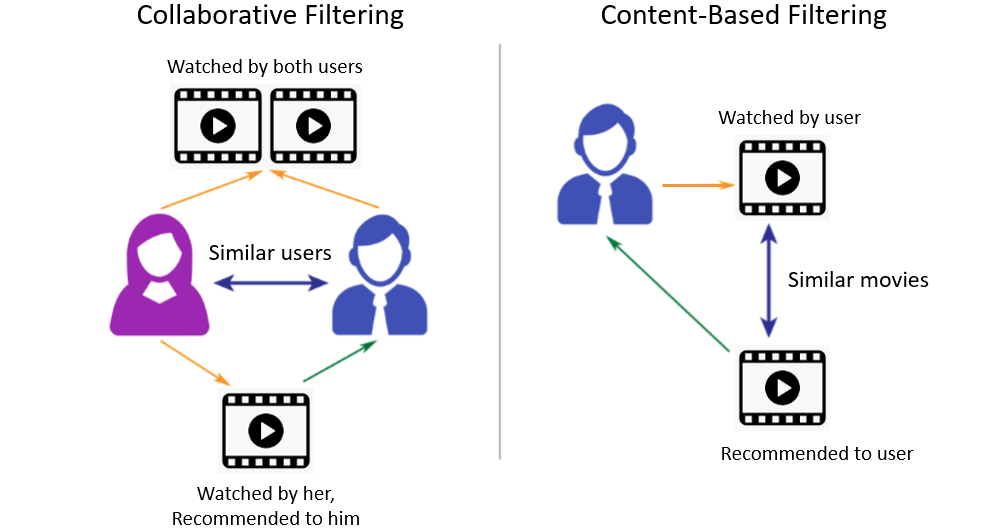

Image reference: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.kdnuggets.com%2F2019%2F11%2Fcontent-based-recommender-using-natural-language-processing-nlp.html&psig=AOvVaw03KOaHghuNupzdiwZkLQnC&ust=1632492327318000&source=images&cd=vfe&ved=0CAkQjhxqFwoTCODX58uilfMCFQAAAAAdAAAAABAD

###Collaborative filtering is broadly classified into:
* **User collaborative filtering:**
In this we find users that have similar interests or preferences as the user U1 and then recommend movies to the user U1 liked by those similar users.<br>
We make a matrix of items each user has liked/viewed and then will compute the similarity between the users.<br>

* **Item collaborative filtering:**
In this we find similar movies instead of similar users.<br>
We will calculate the similarity between movies using the ratings provided by the users. 
We will find every pair of items rated/viewed by the same user and will find the similarity 

###Cosine Similarity:
Cosine similarity metric is used to calculate how similar two items are. Mathematically it measures the cosine angle between two vectors in a multi-dimensional space. **The smaller the angle, the higher cosine similarity.**<br>
The cosine similarity between two vectors is calculated by taking the dot product of the two vectors and dividing it by the magnitude.<br>
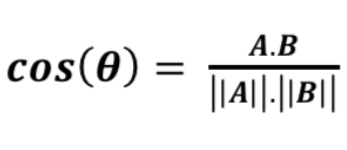
<br>
To calculate the similarity of movies first, we convert the data into vectors and calculate the cosine angle between those vectors. If the angle is 0 then the movies are similar.

#Movie Recommendation Systems using Content-based approach

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#dataset link: https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv
df_movies = pd.read_csv('/content/movie_recommendation_systems/tmdb_5000_movies.csv')
print(df_movies.shape)   #print the shape of dataframe
df_movies.head()  #print the first 5 rows

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df_credits = pd.read_csv('/content/movie_recommendation_systems/tmdb_5000_credits.csv', engine='python')
print(df_credits.shape)
df_credits.head()

(4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df = df_movies.merge(df_credits, on='title')  #merge df_movies & df_credits on title column i.e. df_movies.title = df_credits.title
print(df.shape)
df.head()

(4809, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
#removing unnecessary columns from df (important columns: movie_id, genres, keywords, title, overview, cast, crew)
df = df[['movie_id', 'title', 'genres', 'keywords', 'overview', 'cast', 'crew']]
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df.isnull().sum()   #to check null values in the dataset

movie_id    0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

In [ ]:
#There are 3 rows with null values for overview columns. Since 3 is a small number so we can delete those rows
df.dropna(inplace=True)   #drop those rows which have null values

In [ ]:
df.isnull().sum() 

movie_id    0
title       0
genres      0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [ ]:
df.duplicated().sum()  #to check duplicate rows

0

In [ ]:
df.shape

(4806, 7)

In [ ]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
#we just want the value of name key from above dictionary
from ast import literal_eval   #to convert string to list
def extract(obj):
  l=[]
  for i in literal_eval(obj):
    l.append(i['name'])
  return l

In [ ]:
df['genres'] = df['genres'].apply(extract)  #apply(): apply extract function on the whole genres column

In [ ]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
#Similarly will do for keywords column
df['keywords'] = df['keywords'].apply(extract)

In [ ]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
#overview text is a string so convert it into list
df['overview'] = df['overview'].apply(lambda x:x.split())
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
#For cast we only want top 3 cast i.e. the top 3 main role for that movie. Rest of the cast we can ignore
#so we want to extract the value of name from the first 3 list printed above
def cast_extract(obj):
  count = 0
  l=[]
  for i in literal_eval(obj):
    if count!=3:   #since we want 3 cast name
      l.append(i['name'])
      count+=1
    else:
      break
  return l

df['cast'] = df['cast'].apply(cast_extract)

In [ ]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [ ]:
#for crew we only need the name of the director for our recommendation approach
def director_extract(obj):
  l=[]
  for i in literal_eval(obj):
    if(i['job']=='Director'):
      l.append(i['name'])
  return l

df['crew'] = df['crew'].apply(director_extract)

In [ ]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [ ]:
#remove spaces
df['genres'] = df['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
df['keywords'] = df['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
df['cast'] = df['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
df['crew'] = df['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

In [ ]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [ ]:
#create a column as info containing all the metadata i.e. combining genres, keywords, overview, cast and crew so that we can recommend on the basis pf info column
df['info'] = df['genres'] + df['overview'] + df['keywords'] + df['cast'] + df['crew']
df.head()

,movie_id,title,genres,keywords,overview,cast,crew,info
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, I..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, Captain, Barbossa..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[Action, Adventure, Crime, A, cryptic, message..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Action, Crime, Drama, Thriller, Following, th..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[Action, Adventure, ScienceFiction, John, Cart..."


In [ ]:
#now we can ignore the other columns such as genres, keywords, overview, cast & crew since we have combined all these in one column
df = df[['movie_id', 'title', 'info']]
df.head()

,movie_id,title,info
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction, I..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, Captain, Barbossa..."
2,206647,Spectre,"[Action, Adventure, Crime, A, cryptic, message..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, Following, th..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction, John, Cart..."


In [ ]:
#convert list into string
df['info'] = df['info'].apply(lambda x:" ".join(x))
df.head()

,movie_id,title,info
0,19995,Avatar,Action Adventure Fantasy ScienceFiction In the...
1,285,Pirates of the Caribbean: At World's End,"Adventure Fantasy Action Captain Barbossa, lon..."
2,206647,Spectre,Action Adventure Crime A cryptic message from ...
3,49026,The Dark Knight Rises,Action Crime Drama Thriller Following the deat...
4,49529,John Carter,Action Adventure ScienceFiction John Carter is...


In [ ]:
#stemming:  process of removing suffix and bringing the word to a base word
import nltk      #natural language toolkit: used for processing textual data
from nltk.stem import PorterStemmer    #
ps = PorterStemmer()

def stem(text):
  x=[]
  for i in text.split():
    x.append(ps.stem(i))
  return " ".join(x)

In [ ]:
df['info'] = df['info'].apply(stem)

In [ ]:
df.head()

,movie_id,title,info
0,19995,Avatar,action adventur fantasi sciencefict In the 22n...
1,285,Pirates of the Caribbean: At World's End,"adventur fantasi action captain barbossa, long..."
2,206647,Spectre,action adventur crime A cryptic messag from bo...
3,49026,The Dark Knight Rises,action crime drama thriller follow the death o...
4,49529,John Carter,action adventur sciencefict john carter is a w...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=6000, stop_words='english')   #CountVectorizer(): used to convert text into vector based on the count of each word
vector = vectorizer.fit_transform(df['info']).toarray()

In [ ]:
print(vector.shape)
vector

(4806, 6000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
CosineSimilarity = cosine_similarity(vector)   #find the distance between each vectors i.e. it will calculate distance between each movie (vector)

In [ ]:
CosineSimilarity

array([[1.        , 0.08035074, 0.08155909, ..., 0.04331481, 0.        ,
        0.        ],
       [0.08035074, 1.        , 0.05970814, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.08155909, 0.05970814, 1.        , ..., 0.02414023, 0.        ,
        0.        ],
       ...,
       [0.04331481, 0.02378257, 0.02414023, ..., 1.        , 0.03922323,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03922323, 1.        ,
        0.08626622],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08626622,
        1.        ]])

In [ ]:
#Recommend function
def recommend_movie(movie_name):
  idx = df[df['title'] == movie_name].index[0]          #find the index of the movie_name from df
  distance_movies = CosineSimilarity[idx]
  #we want to recommend top 6 similar movies. So for that first will sort the distances in descending order while retainig the index id
  similar_movies = sorted(list(enumerate(distance_movies)), reverse=True, key=lambda x:x[1])[1:7]
  print("Recommended Movies are:")  
  for i in similar_movies:
    print(df.iloc[i[0]].title)   #print the title of top 6 similar movies

In [ ]:
df.iloc[3]

movie_id                                                49026
title                                   The Dark Knight Rises
info        action crime drama thriller follow the death o...
Name: 3, dtype: object

In [ ]:
#recommend movies for 'The Dark Knight Rises'
try:
  movie = input("Enter movie name: ")
  recommend_movie(movie)
except IndexError:
  print("This movie is not present in the dataset")

Enter movie name: The Dark Knight Rises
Recommended Movies are:
The Dark Knight
Batman Forever
Batman Begins
Batman
Batman Returns
Batman


#Summary
A recommendation system is a useful application of Machine Learning. It recommends similar items to the user based on their previous activities.<br>
There are two types of recommendation system: content-based recommendation system and collaborative filtering recommendation system.<br>
The similarity between movies is calculated using cosine similarity which is available in sklearn library.<br>
In this tutorial we built a content-based movie recommendation system that recommends movie given the title of the movie as input.

References:<br>
https://www.analyticsvidhya.com/blog/2020/11/create-your-own-movie-movie-recommendation-system/<br>
https://techvidvan.com/tutorials/movie-recommendation-system-python-machine-learning/